In [1]:
import numpy as np
import pandas as pd
import math
import sys, os
sys.path.insert(0,'../scripts/')
from data_fetch import get_data
from data_cleaning_transformation import get_row_nan_percentage, get_missing_values,fix_missing_bfill,fix_missing_value,convert_to_datetime,convert_to_integer,convert_to_string,drop_duplicate,fix_outliers
from plot import plotly_hist,box

In [2]:
data = get_data('data/Week1_challenge_data_source.csv','C:/Users/User/Desktop/Telecom-data-analysis','Week1_challenge_data_source_v1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

In [4]:
data.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [5]:
get_missing_values(data)

,column_name,percent_missing
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Email DL (Bytes),Email DL (Bytes),0.000000


In [6]:
df_telco_missing = get_missing_values(data)
df_telco_cols_to_remove = df_telco_missing[df_telco_missing['percent_missing'] >= 30].index.tolist()
df_telco_cols_to_remove

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'TCP DL Retrans. Vol (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [7]:
df_telco_cols_to_remove = [col for col in df_telco_cols_to_remove if col not in ['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']]
df_telco_cols_to_remove

['HTTP DL (Bytes)',
 'HTTP UL (Bytes)',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 37500B < Vol UL']

In [8]:
df_telco_clean = data.drop(df_telco_cols_to_remove, axis=1)
df_telco_clean.shape

(150001, 47)

In [9]:
get_missing_values(df_telco_clean)

,column_name,percent_missing
Google UL (Bytes),Google UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Youtube DL (Bytes),Youtube DL (Bytes),0.000000
Email UL (Bytes),Email UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Google DL (Bytes),Google DL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000


In [10]:
fix_missing_bfill(df_telco_clean, 'TCP UL Retrans. Vol (Bytes)')
fix_missing_bfill(df_telco_clean, 'TCP DL Retrans. Vol (Bytes)')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [11]:
print(f"Avg RTT DL (ms) {df_telco_clean['Avg RTT DL (ms)'].skew(skipna=True)}")
print(f"Avg RTT UL (ms) {df_telco_clean['Avg RTT UL (ms)'].skew(skipna=True)}")

Avg RTT DL (ms) 62.90782807995961
Avg RTT UL (ms) 28.45741458546382


In [12]:
fix_missing_bfill(df_telco_clean, 'Avg RTT UL (ms)')
fix_missing_bfill(df_telco_clean, 'Avg RTT DL (ms)')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [13]:
get_missing_values(df_telco_clean)

,column_name,percent_missing
Youtube UL (Bytes),Youtube UL (Bytes),0.000000
Gaming DL (Bytes),Gaming DL (Bytes),0.000000
Netflix UL (Bytes),Netflix UL (Bytes),0.000000
Other DL (Bytes),Other DL (Bytes),0.000000
Gaming UL (Bytes),Gaming UL (Bytes),0.000000
Other UL (Bytes),Other UL (Bytes),0.000000
Netflix DL (Bytes),Netflix DL (Bytes),0.000000
Social Media UL (Bytes),Social Media UL (Bytes),0.000000
Google DL (Bytes),Google DL (Bytes),0.000000
Google UL (Bytes),Google UL (Bytes),0.000000


In [14]:
fix_missing_value(df_telco_clean, 'Handset Type', 'unknown')
fix_missing_value(df_telco_clean, 'Handset Manufacturer', 'unknown')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [15]:
df_telco_clean.dropna(inplace=True)

In [16]:
get_missing_values(df_telco_clean)

,column_name,percent_missing
Bearer Id,Bearer Id,0.0
Activity Duration UL (ms),Activity Duration UL (ms),0.0
Dur. (ms).1,Dur. (ms).1,0.0
Handset Manufacturer,Handset Manufacturer,0.0
Handset Type,Handset Type,0.0
Nb of sec with Vol DL < 6250B,Nb of sec with Vol DL < 6250B,0.0
Nb of sec with Vol UL < 1250B,Nb of sec with Vol UL < 1250B,0.0
Social Media DL (Bytes),Social Media DL (Bytes),0.0
Social Media UL (Bytes),Social Media UL (Bytes),0.0
Google DL (Bytes),Google DL (Bytes),0.0


In [17]:
df_telco_clean.dtypes

Bearer Id                         float64
Start                              object
Start ms                          float64
End                                object
End ms                            float64
Dur. (ms)                         float64
IMSI                              float64
MSISDN/Number                     float64
IMEI                              float64
Last Location Name                 object
Avg RTT DL (ms)                   float64
Avg RTT UL (ms)                   float64
Avg Bearer TP DL (kbps)           float64
Avg Bearer TP UL (kbps)           float64
TCP DL Retrans. Vol (Bytes)       float64
TCP UL Retrans. Vol (Bytes)       float64
DL TP < 50 Kbps (%)               float64
50 Kbps < DL TP < 250 Kbps (%)    float64
250 Kbps < DL TP < 1 Mbps (%)     float64
DL TP > 1 Mbps (%)                float64
UL TP < 10 Kbps (%)               float64
10 Kbps < UL TP < 50 Kbps (%)     float64
50 Kbps < UL TP < 300 Kbps (%)    float64
UL TP > 300 Kbps (%)              

In [18]:
df_telco_clean = convert_to_datetime(df_telco_clean, 'Start')
df_telco_clean = convert_to_datetime(df_telco_clean, 'End')

In [19]:
df_telco_clean = convert_to_integer(df_telco_clean, 'Bearer Id')
df_telco_clean = convert_to_integer(df_telco_clean, 'IMSI')
df_telco_clean = convert_to_integer(df_telco_clean, 'IMEI')
df_telco_clean = convert_to_integer(df_telco_clean, 'MSISDN/Number')

In [20]:
df_telco_clean = convert_to_string(df_telco_clean, 'Last Location Name')
df_telco_clean = convert_to_string(df_telco_clean, 'Handset Manufacturer')
df_telco_clean = convert_to_string(df_telco_clean, 'Handset Type')

In [21]:
df_telco_clean.dtypes

Bearer Id                                  int64
Start                             datetime64[ns]
Start ms                                 float64
End                               datetime64[ns]
End ms                                   float64
Dur. (ms)                                float64
IMSI                                       int64
MSISDN/Number                              int64
IMEI                                       int64
Last Location Name                        string
Avg RTT DL (ms)                          float64
Avg RTT UL (ms)                          float64
Avg Bearer TP DL (kbps)                  float64
Avg Bearer TP UL (kbps)                  float64
TCP DL Retrans. Vol (Bytes)              float64
TCP UL Retrans. Vol (Bytes)              float64
DL TP < 50 Kbps (%)                      float64
50 Kbps < DL TP < 250 Kbps (%)           float64
250 Kbps < DL TP < 1 Mbps (%)            float64
DL TP > 1 Mbps (%)                       float64
UL TP < 10 Kbps (%) 

In [22]:
df_telco_clean = drop_duplicate(df_telco_clean)
df_telco_clean.shape

(146887, 47)

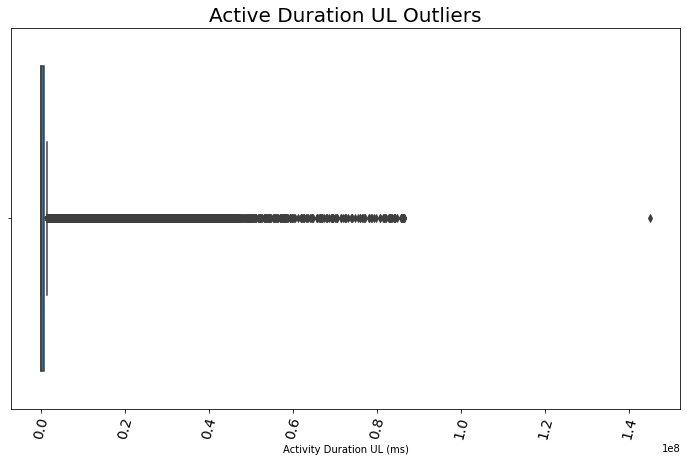

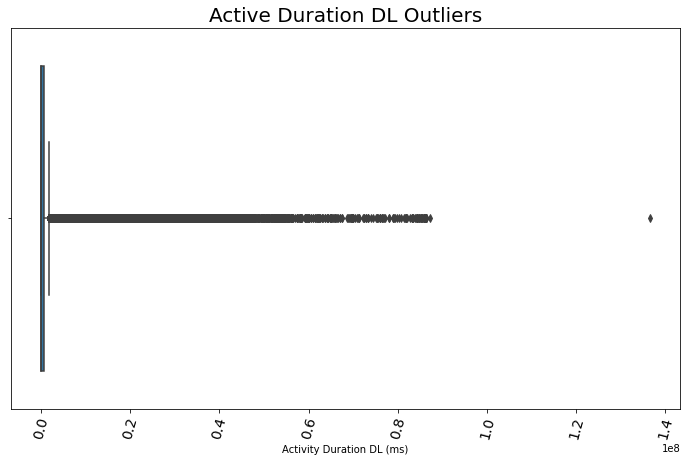

In [23]:
box(df_telco_clean, 'Activity Duration UL (ms)', 'Active Duration UL Outliers')
box(df_telco_clean, 'Activity Duration DL (ms)', 'Active Duration DL Outliers')

In [28]:
df_telco_clean = fix_outliers(df_telco_clean)

In [30]:
df_telco_clean['Social Media Data Volume (Bytes)'] = df_telco_clean['Social Media UL (Bytes)'] + df_telco_clean['Social Media DL (Bytes)']
df_telco_clean['Google Data Volume (Bytes)'] = df_telco_clean['Google UL (Bytes)'] + df_telco_clean['Google DL (Bytes)']
df_telco_clean['Email Data Volume (Bytes)'] = df_telco_clean['Email UL (Bytes)'] + df_telco_clean['Email DL (Bytes)']
df_telco_clean['Youtube Data Volume (Bytes)'] = df_telco_clean['Youtube UL (Bytes)'] + df_telco_clean['Youtube DL (Bytes)']
df_telco_clean['Netflix Data Volume (Bytes)'] = df_telco_clean['Netflix UL (Bytes)'] + df_telco_clean['Netflix DL (Bytes)']
df_telco_clean['Gaming Data Volume (Bytes)'] = df_telco_clean['Gaming UL (Bytes)'] + df_telco_clean['Gaming DL (Bytes)']
df_telco_clean['Other Data Volume (Bytes)'] = df_telco_clean['Other UL (Bytes)'] + df_telco_clean['Other DL (Bytes)']
df_telco_clean['Total Data Volume (Bytes)'] = df_telco_clean['Total UL (Bytes)'] + df_telco_clean['Total DL (Bytes)']

In [31]:
df_telco_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146887 entries, 0 to 149995
Data columns (total 55 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Bearer Id                         146887 non-null  int64         
 1   Start                             146887 non-null  datetime64[ns]
 2   Start ms                          146887 non-null  float64       
 3   End                               146887 non-null  datetime64[ns]
 4   End ms                            146887 non-null  float64       
 5   Dur. (ms)                         146887 non-null  float64       
 6   IMSI                              146887 non-null  int64         
 7   MSISDN/Number                     146887 non-null  int64         
 8   IMEI                              146887 non-null  int64         
 9   Last Location Name                146887 non-null  string        
 10  Avg RTT DL (ms)                 

In [32]:
df_telco_clean.to_csv('../data/cleaned_data.csv')